In [5]:
pip install pandas matplotlib numpy


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df= pd.read_csv('height-weight.csv',delim_whitespace=True)

/var/folders/pz/q2_g59_d5rz4vr3vt0jrbzmm0000gn/T/ipykernel_5195/1194614499.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df= pd.read_csv('height-weight.csv',delim_whitespace=True)


In [4]:
df.head()

,Weight,Height
0,72.5,178
1,65.3,169
2,80.1,182
3,55.7,160
4,90.6,185


Text(0, 0.5, 'height')

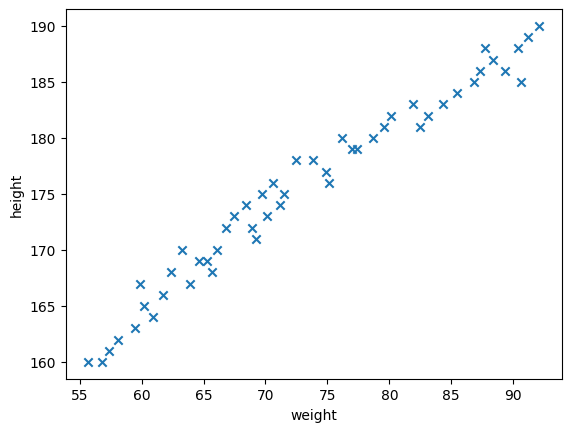

In [10]:
## scatter plot
plt.scatter(df['Weight'], df['Height'],marker='x')
plt.xlabel('weight')
plt.ylabel('height')

In [10]:
print(df.columns)

Index(['Weight', 'Height'], dtype='object')


In [11]:
df.corr() ## findind correlation

,Weight,Height
Weight,1.000,0.983
Height,0.983,1.000


In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


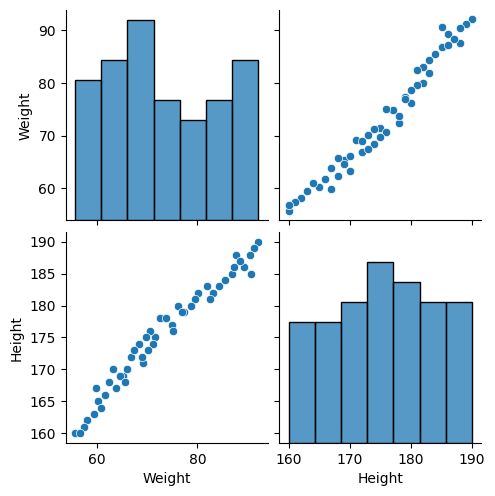

In [50]:
## seaborn for better visualization 
import seaborn as sns
sns.pairplot(df)

In [ ]:
## independent and dependent =features
X = df[['Weight']]    ## using just another bracket it will be dataframe or 2d array
Y = df['Height']     ## using just another bracket it will be series or 1d array 


(50, 1)

In [11]:
## train test split 
!pip install scikit-learn

In [12]:
## independent and dependent =features
X = df[['Weight']]    ## using just another bracket it will be dataframe or 2d array
Y = df['Height']     ## using just another bracket it will be series or 1d array 

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=42)


In [15]:
## standardization
from sklearn.preprocessing import StandardScaler
## we standarise the input data not the output data because our gradient descent to the indepndent faeture

In [18]:
scaler= StandardScaler() ## it will standardize the data with the formulla z=(x-mean)/std
X_train = scaler.fit_transform(X_train) ## fit the data and transform it


In [19]:
X_test= scaler.transform(X_test) ## we only transform the test data to avoid data leakage means our test data should not be used in training
print(X_test)

[[ 0.5910511 ]
 [-0.02274303]
 [ 1.03654683]
 [ 1.09594626]
 [ 1.39294342]
 [ 1.57114171]
 [ 1.68004067]
 [-0.96323402]
 [ 1.95723801]
 [ 0.34355347]
 [-0.45833885]
 [ 1.89783858]
 [-1.18103193]]


In [22]:
## applying simple linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(n_jobs=-1) ## creating the object of the class

In [23]:
regressor.fit(X_train,Y_train) ## fit the model on the training data

LinearRegression(n_jobs=-1)

In [27]:
print("slope",regressor.coef_) ## slope y= b0+ b1x
print("intercept" , regressor.intercept_ )## intercept

slope [8.00712865]
intercept 174.1891891891892


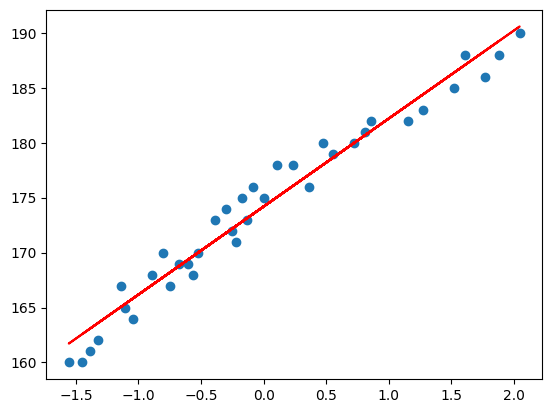

In [29]:
## plot training data plot best fit line 
plt.scatter(X_train,Y_train)
plt.plot(X_train,regressor.predict(X_train),color='red')

In [30]:
## predsictiuon for test data 
y_pred=regressor.predict(X_test) ## it will give the prediction for the test data

In [ ]:
## performance matric
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [33]:
mse= mean_squared_error(Y_test,y_pred) ## mean squared error
mae= mean_absolute_error(Y_test,y_pred) ## mean absolute error
rmse= np.sqrt(mse) ## root mean squared error
r2= r2_score(Y_test,y_pred) ## r squared score
print("mse",mse)
print("mae",mae)
print("rmse",rmse)
print("r2",r2)

mse 2.487047142601004
mae 1.1008254831472253
rmse 1.577037457577024
r2 0.9594294433301573


adjusted r2 0.9557412109056261


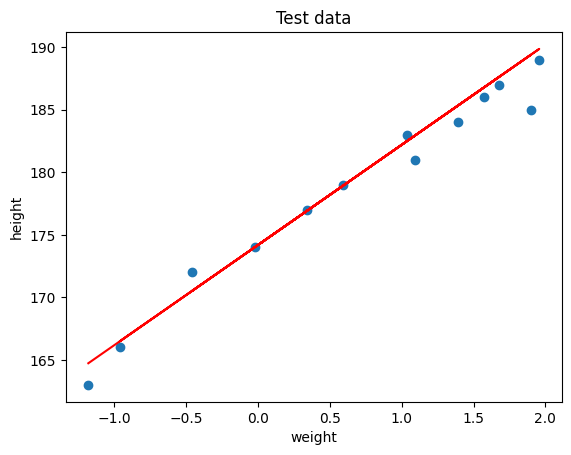

In [34]:
## display adjusted r squared
def adj_r2(r2,n,k):
    return 1-((1-r2)*(n-1)/(n-k-1))
n= len(X_test) ## number of test data
k=1 ## number of features
print("adjusted r2",adj_r2(r2,n,k))
## plot test data
plt.scatter(X_test,Y_test)
plt.plot(X_test,y_pred,color='red')
plt.xlabel('weight')
plt.ylabel('height')
plt.title('Test data')
plt.show()

In [37]:
## ols linear regression
!pip install statsmodels


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 1.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]


In [38]:
import statsmodels.api as sm

In [39]:
model= sm.OLS(Y_train,X_train).fit()## creating the object of the class

In [40]:
prediction= model.predict(X_test) ## it will give the prediction for the test data
print(prediction)

[ 4.73262216 -0.18210633  8.29976381  8.7753827  11.15347713 12.58033379
 13.45230175 -7.7127387  15.67185656  2.7508768  -3.66997817 15.19623767
 -9.45667462]


In [41]:
print(model.summary()) ## summary of the model

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):             -0.026
Method:                 Least Squares   F-statistic:                            0.07606
Date:                Tue, 20 May 2025   Prob (F-statistic):                       0.784
Time:                        03:58:00   Log-Likelihood:                         -243.43
No. Observations:                  37   AIC:                                      488.9
Df Residuals:                      36   BIC:                                      490.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [43]:
## prediction for new data

regressor.predict([[72]]) ## it will give the prediction for the new data
## oh my god with just weight of 72 it is giving the height of 750.70 this is because we have not standardized the data
## so we need to standardize the data before prediction
X_new= scaler.transform([[72]]) ## we only transform the new data to avoid data leakage means our new data should not be used in training   
print(regressor.predict(X_new)) ## it will give the prediction for the new data

[174.64124137]


/Users/sumankumar/Desktop/Udemy DS/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
